Metoda klasteryzacji kMeans dla ośmiu klastrów oraz automatyczny wybór punktów centralnych.

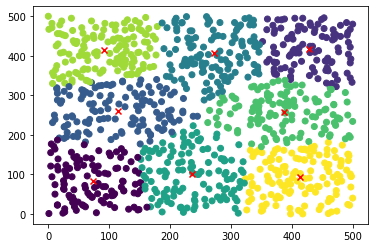

In [61]:
import random

points = []
for i in range(1000):
    x = random.randint(0, 500)
    y = random.randint(0, 500)
    points.append((x, y))

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)
kmeans.fit(points)

clusters = kmeans.predict(points)
cluster_centers = kmeans.cluster_centers_

import matplotlib.pyplot as plt

plt.scatter([p[0] for p in points], [p[1] for p in points], c=clusters)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x')
plt.show()

**Klasteryzacja na podstawie odległości do najbliższego centroidu**

Generujemy 1000 losowo rozmieszczonych punktów odpowiadających użytkownikom sieci, o współrzędnych z zakresu (0:500, 0:500).

In [62]:
import random

points = []
for i in range(1000):
    x = random.randint(0, 500)
    y = random.randint(0, 500)
    points.append((x, y))

Zaznaczamy 9 punktów (routerów), które będą centroidami naszych klastrów. Ręcznie przypisujemy im współrzędne. Następnie tworzymy zmienną, która zawierać będzie odleglości do routerów. Każdy użytkownik zostanie zakwalifikowany do konkretnego klastra na podstawie odległości dzielącej go od routera.  

In [63]:
import numpy as np
from sklearn.metrics import pairwise_distances

center_points = np.array([[50, 50], [450, 450], [50, 450], [450, 50], [250, 250],
                          [300, 75], [100, 400], [375, 250], [100, 250]])
distances = pairwise_distances(points, center_points)
clusters = np.argmin(distances, axis=1)

Obrazujemy rozmieszczenie użytkowników za pomocą punktów oraz rozmieszczenie routerów za pomocą czerwonych liter X. Następnie punkty przybierają kolor, który świadczy o przynależności do konkretnego klastra, a który wybierany jest na podstawie najkrótszej odległości od użytkownika.

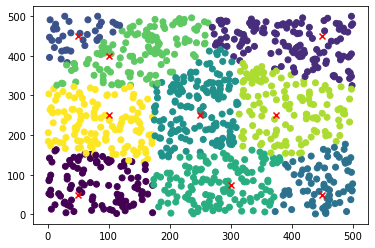

In [64]:
import matplotlib.pyplot as plt
plt.scatter([p[0] for p in points], [p[1] for p in points], c=clusters)
plt.scatter(center_points[:, 0], center_points[:, 1], c='red', marker='x')
plt.show()

**Klasteryzacja na podstawie odległości do najbliższego centroidu oraz parametru prędkość**

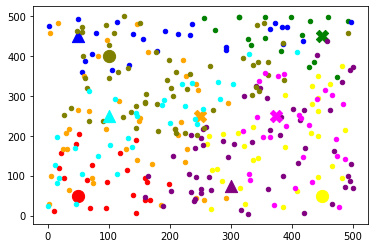

In [65]:
import random
import math
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y, color, predkosc):
        self.x = x
        self.y = y
        self.color = color
        self.predkosc = predkosc

    def dystans(self, other):
        return math.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)

points = []
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'magenta', 'aqua']
predkosci = [50, 100, 150]

for i in range(300):
    x = random.randint(0, 500)
    y = random.randint(0, 500)
    color = random.choice(colors)
    predkosc = random.choice(predkosci)
    points.append(Point(x, y, color, predkosc))

centers = [Point(50, 50, 'red', 50),
           Point(450, 450, 'green', 100),
           Point(50, 450, 'blue', 150),
           Point(450, 50, 'yellow', 50),
           Point(250, 250, 'orange', 100),
           Point(300, 75, 'purple', 150),
           Point(100, 400, 'olive', 50),
           Point(375, 250, 'magenta', 100),
           Point(100, 250, 'aqua', 150)]

clusters = {center:[] for center in centers}

for point in points:
    nearest_center = min(centers, key = lambda center: point.dystans(center) if center.predkosc == point.predkosc else float('inf'))
    clusters[nearest_center].append(point)

for center, cluster in clusters.items():
    x_coords = [point.x for point in cluster]
    y_coords = [point.y for point in cluster]
    plt.scatter(x_coords, y_coords, color = center.color, s = 20)
    if center.predkosc == 50:
        plt.scatter(center.x, center.y, marker = 'o', color = center.color, s = 150)
    elif center.predkosc == 100:
        plt.scatter(center.x, center.y, marker = 'X', color = center.color, s = 150)
    elif center.predkosc == 150:
        plt.scatter(center.x, center.y, marker = '^', color = center.color, s = 150)

plt.show()

**Klasteryzacja na podstawie odległości do najbliższego centroidu oraz parametru ping**

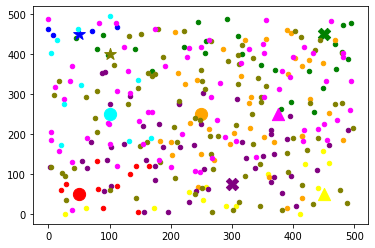

In [66]:
import random
import math
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y, color, ping):
        self.x = x
        self.y = y
        self.color = color
        self.ping = ping

    def dystans(self, other):
        return math.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)

points = []
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'magenta', 'aqua']
pingi = range(10,151)

for i in range(300):
    x = random.randint(0, 500)
    y = random.randint(0, 500)
    color = random.choice(colors)
    ping = random.choice(pingi)
    points.append(Point(x, y, color, ping))

centers = [Point(50, 50, 'red', range(10, 40)),
           Point(450, 450, 'green', range(40, 80)),
           Point(50, 450, 'blue', range(80, 120)),
           Point(450, 50, 'yellow', range(120, 151)),
           Point(250, 250, 'orange', range(10, 40)),
           Point(300, 75, 'purple', range(40, 80)),
           Point(100, 400, 'olive', range(80, 120)),
           Point(375, 250, 'magenta', range(120, 151)),
           Point(100, 250, 'aqua', range(10, 40))]

clusters = {center:[] for center in centers}

for point in points:
    nearest_center = min(centers, key = lambda center: point.dystans(center) if point.ping in center.ping else float('inf'))
    clusters[nearest_center].append(point)

for center, cluster in clusters.items():
    x_coords = [point.x for point in cluster]
    y_coords = [point.y for point in cluster]
    plt.scatter(x_coords, y_coords, color = center.color, s = 20)
    if center.ping == range(10,40):
        plt.scatter(center.x, center.y, marker = 'o', color = center.color, s = 150)
    elif center.ping == range(40,80):
        plt.scatter(center.x, center.y, marker = 'X', color = center.color, s = 150)
    elif center.ping == range(80,120):
        plt.scatter(center.x, center.y, marker = '*', color = center.color, s = 150)
    elif center.ping == range(120,151):
        plt.scatter(center.x, center.y, marker = '^', color = center.color, s = 150)

plt.show()

**Klasteryzacja na podstawie odległości do najbliższego centroidu oraz parametru pingpriorytet**

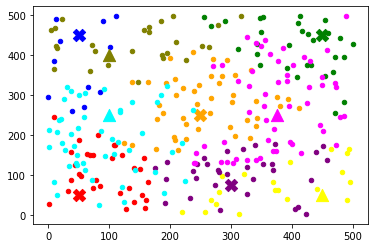

In [82]:
import random
import math
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y, color, priorytet):
        self.x = x
        self.y = y
        self.color = color
        self.priorytet = priorytet

    def dystans(self, other):
        return math.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)

points = []
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'magenta', 'aqua']
priorytety = [0, 1, 2]

for i in range(300):
    x = random.randint(0, 500)
    y = random.randint(0, 500)
    color = random.choice(colors)
    priorytet = random.choice(priorytety)
    points.append(Point(x, y, color, priorytet))

centers = [Point(50, 50, 'red', 1),
           Point(450, 450, 'green', 1),
           Point(50, 450, 'blue', 1),
           Point(450, 50, 'yellow', 2),
           Point(250, 250, 'orange', 1),
           Point(300, 75, 'purple', 1),
           Point(100, 400, 'olive', 2),
           Point(375, 250, 'magenta', 2),
           Point(100, 250, 'aqua', 2)]

clusters = {center:[] for center in centers}

for point in points:
    if point.priorytet == 0:
        nearest_center = min(centers, key = lambda center: point.dystans(center))
    else:
        nearest_center = min(centers, key = lambda center: point.dystans(center) if center.priorytet == point.priorytet else float('inf'))
    clusters[nearest_center].append(point)

for center, cluster in clusters.items():
    x_coords = [point.x for point in cluster]
    y_coords = [point.y for point in cluster]
    plt.scatter(x_coords, y_coords, color = center.color, s = 20)
    if center.priorytet == 1:
        plt.scatter(center.x, center.y, marker = 'X', color = center.color, s = 150)
    elif center.priorytet == 2:
        plt.scatter(center.x, center.y, marker = '^', color = center.color, s = 150)

plt.show()